The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades Columns Description- total 43 columns -Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        # importing necessary Libraries.
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df   # importing Dataset.

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [5]:
df.tail(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
df.isnull().sum()  # To CHECK NULL VALUES. 

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
df.isnull().sum().sum()

# Observations:
# Null Values cannot be treated as mode or median
# Null Values can be replaced with 0(May be the students have not attended also )
# it contain total values of 425 values.( out of 571 rows)

425

In [9]:
df.dtypes # To Check Datatypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

                                  NULL VALUES HANDLING

In [11]:
df=df.fillna(0)      # Filled the Whole DataFrame Nan values with Zero as the students might not attended the exam,so as logic 
                    # we cannot fill the values by mode or median() 
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [12]:
df.isnull().sum() # after filling Nan values,rechecking the dataset.

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [13]:
df.tail(10) # checking in the 565th row also 

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,0,D+,D,0,0,...,0,0,0,0,0,0,0,0,0,0.800
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


                                      VISUALIZATION (EDA)

In [16]:
df_features=df.drop(['Seat No.','CGPA'],axis=1)
df_features

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [17]:
df_target=df['CGPA']
df_target


0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [18]:
df_features.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

<bound method IndexOpsMixin.value_counts of 0      B-
1       A
2       A
3       D
4      A-
       ..
566     B
567    A+
568     B
569     A
570     C
Name: PH-121, Length: 571, dtype: object>


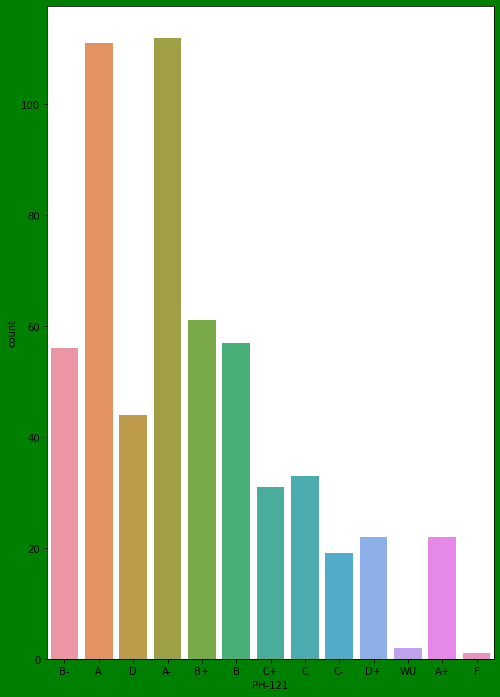

In [19]:
plt.figure(figsize=(8,12),facecolor='green')
sns.countplot(df_features['PH-121'])
print(df_features['PH-121'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      D+
1       D
2       B
3      C+
4      A-
       ..
566     A
567     A
568     A
569    B+
570     D
Name: HS-101, Length: 571, dtype: object>


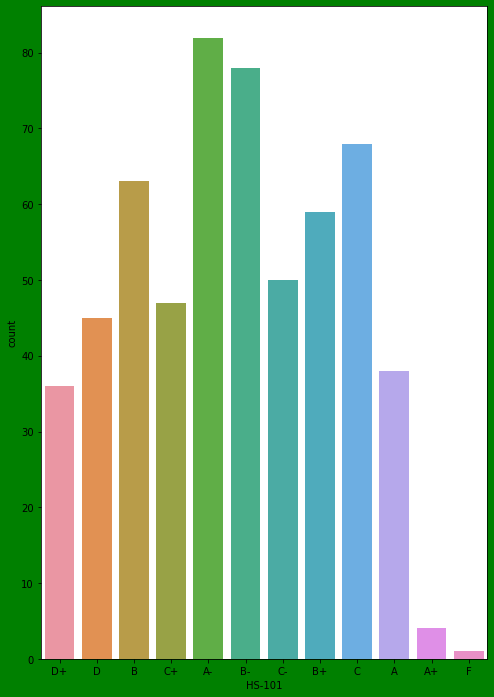

In [20]:
plt.figure(figsize=(8,12),facecolor='green')
sns.countplot(df_features['HS-101'])
print(df_features['HS-101'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      C-
1      D+
2       A
3      D+
4      A-
       ..
566     A
567     A
568    A-
569     D
570     D
Name: CY-105, Length: 571, dtype: object>


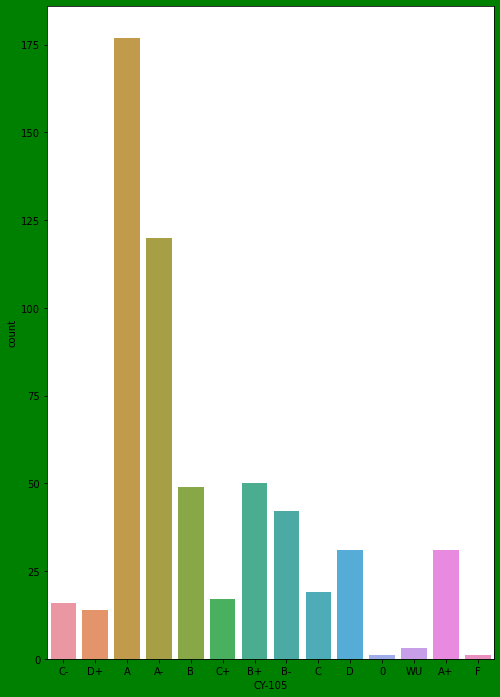

In [21]:
plt.figure(figsize=(8,12),facecolor='green')
sns.countplot(df_features['CY-105'])
print(df_features['CY-105'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       C
1       D
2      B-
3       D
4      B+
       ..
566    A-
567     A
568    B+
569     A
570     C
Name: HS-105/12, Length: 571, dtype: object>


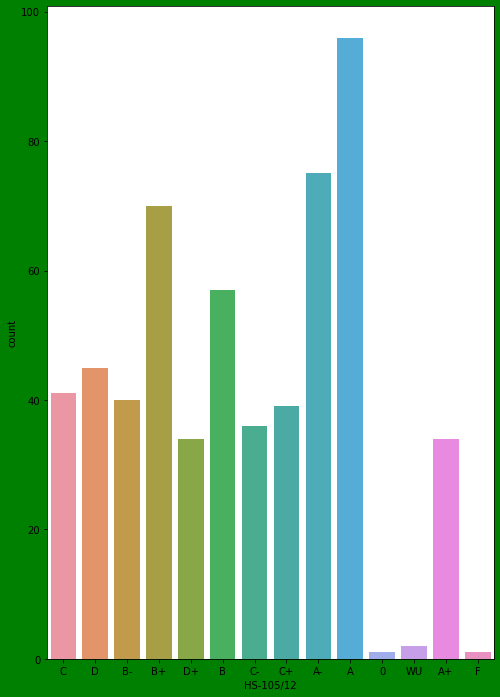

In [22]:
plt.figure(figsize=(8,12),facecolor='green')
sns.countplot(df_features['HS-105/12'])
print(df_features['HS-105/12'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      C-
1      B-
2      B+
3       D
4       A
       ..
566    A+
567     A
568     A
569     D
570     C
Name: MT-111, Length: 571, dtype: object>


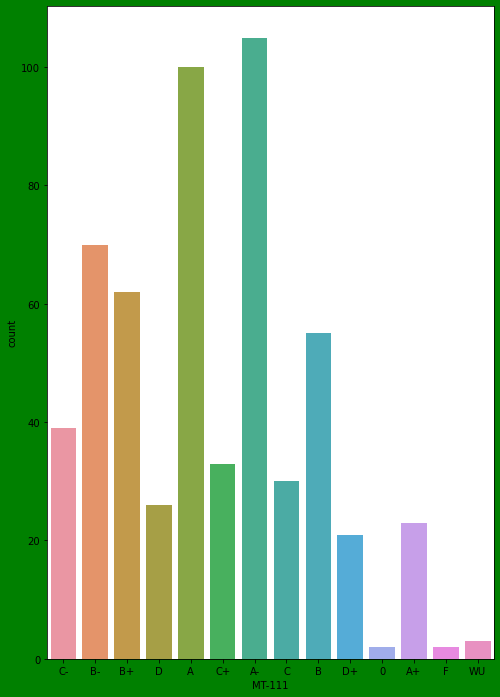

In [23]:
plt.figure(figsize=(8,12),facecolor='green')
sns.countplot(df_features['MT-111'])
print(df_features['MT-111'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      D+
1       C
2       A
3      A-
4       A
       ..
566     A
567     A
568     A
569    D+
570    D+
Name: CS-105, Length: 571, dtype: object>


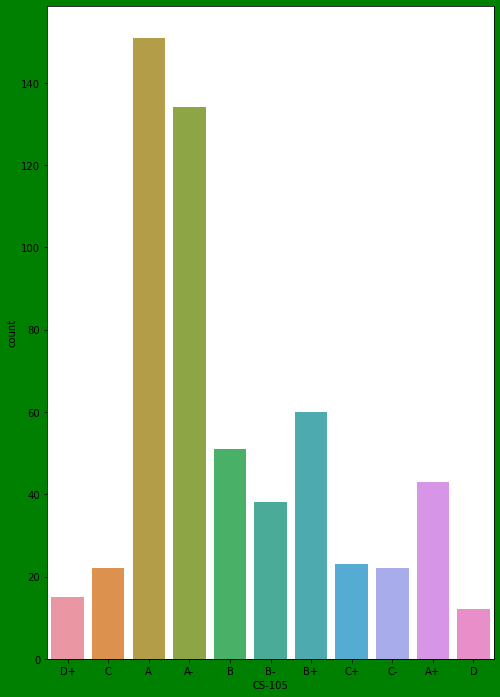

In [25]:
plt.figure(figsize=(8,12),facecolor='green')
sns.countplot(df_features['CS-105'])
print(df_features['CS-105'].value_counts)

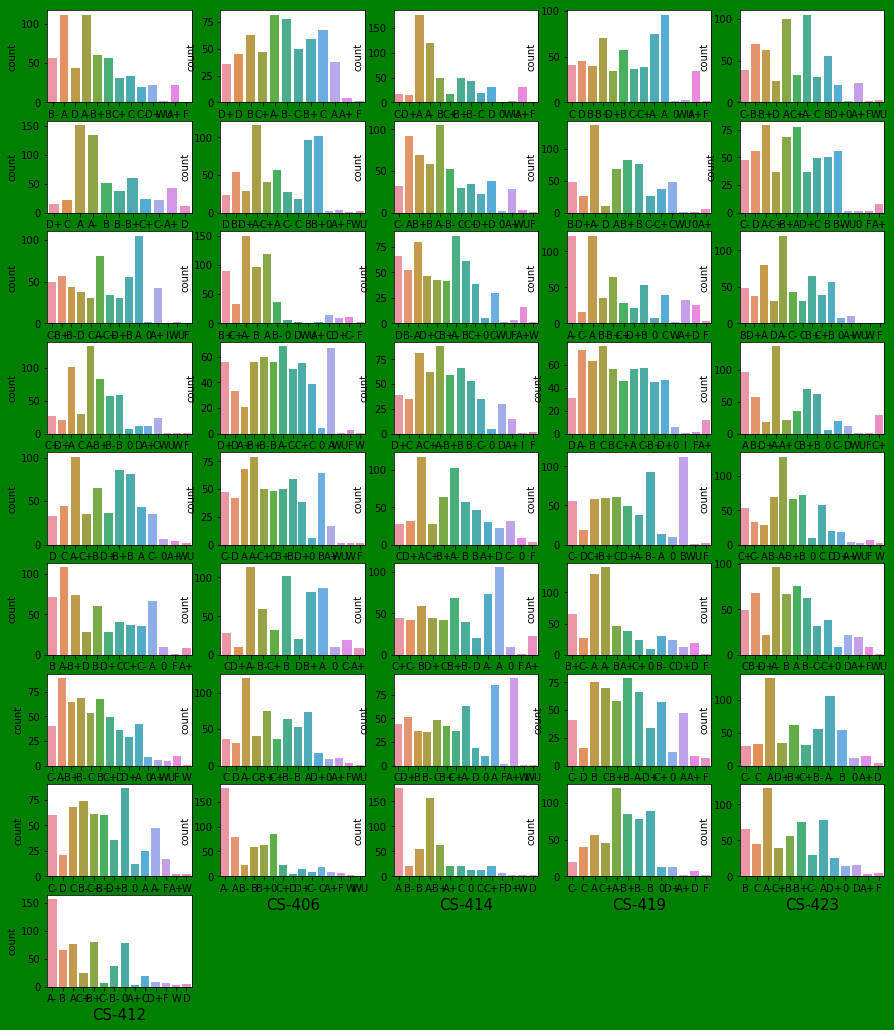

In [24]:
plt.figure(figsize=(15,20),facecolor='green')  # Visualizing all columns,countplot.
plotnumber=1
for column in df_features:
    if plotnumber<=42:
        plt.subplot(10,5,plotnumber)
        ax=sns.countplot(df_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()
    

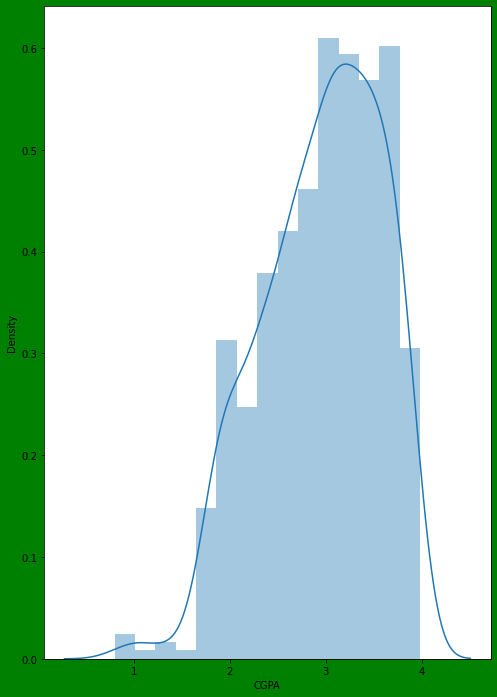

In [25]:
plt.figure(figsize=(8,12),facecolor='green')   # Visualizing the Target Column
sns.distplot(df_target)
plt.show()                                   

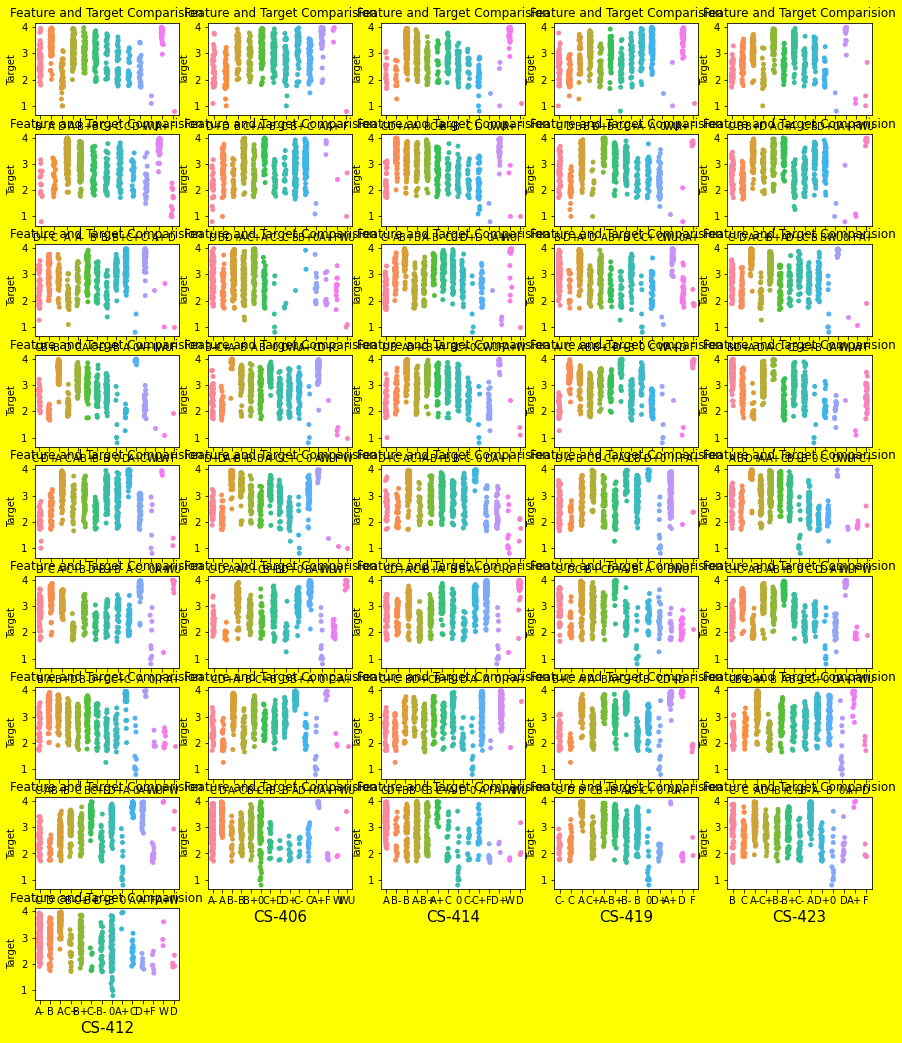

In [26]:
plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1
for column in df_features:
    if plotnumber<=42:
        plt.subplot(10,5,plotnumber)
        ax=sns.stripplot(x=df_features[column],y=df_target)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Target')
        plt.title('Feature and Target Comparision')
    plotnumber+=1
plt.show()

                                ENCODING.

In [27]:
from category_encoders import BinaryEncoder

In [28]:
Be=BinaryEncoder()

In [29]:
df_bi_enc=Be.fit_transform(df_features)
df_bi_enc

,PH-121_0,PH-121_1,PH-121_2,PH-121_3,HS-101_0,HS-101_1,HS-101_2,HS-101_3,CY-105_0,CY-105_1,...,CS-419_2,CS-419_3,CS-423_0,CS-423_1,CS-423_2,CS-423_3,CS-412_0,CS-412_1,CS-412_2,CS-412_3
0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,1
3,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,1,0,1,0,1,...,0,1,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,1
567,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
568,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
569,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,1,0,1,0


In [30]:
x=df_bi_enc
x

,PH-121_0,PH-121_1,PH-121_2,PH-121_3,HS-101_0,HS-101_1,HS-101_2,HS-101_3,CY-105_0,CY-105_1,...,CS-419_2,CS-419_3,CS-423_0,CS-423_1,CS-423_2,CS-423_3,CS-412_0,CS-412_1,CS-412_2,CS-412_3
0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,1
3,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,1,0,1,0,1,...,0,1,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,1
567,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
568,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
569,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,1,0,1,0


In [31]:
y=df_target
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

                                           PCA.

In [32]:
from sklearn.decomposition import PCA

In [33]:
# Before PCA,Scaling the featues
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.45798009, -0.99475979, -0.93717099, ..., -0.62935524,
        -0.78585224,  0.7484045 ],
       [-0.45798009, -0.99475979,  1.06704113, ..., -0.62935524,
         1.27250385, -1.33617583],
       [-0.45798009, -0.99475979,  1.06704113, ..., -0.62935524,
         1.27250385,  0.7484045 ],
       ...,
       [-0.45798009,  1.00526782,  1.06704113, ..., -0.62935524,
        -0.78585224,  0.7484045 ],
       [-0.45798009, -0.99475979,  1.06704113, ..., -0.62935524,
         1.27250385, -1.33617583],
       [ 2.18350103, -0.99475979, -0.93717099, ...,  1.58892774,
         1.27250385, -1.33617583]])

In [35]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 0.8307299 , -2.54014675, -0.34706054, ...,  0.12924483,
        -0.35115   , -0.41498866],
       [ 2.15385164,  0.36471907, -1.05390654, ..., -0.5225527 ,
         0.31003434, -0.73448853],
       [-2.44179951, -0.37433467, -0.86662198, ..., -0.30125449,
        -0.1043098 , -0.08389303],
       ...,
       [-2.74439437,  0.49087688,  2.10130211, ...,  0.23749346,
        -0.17938433, -0.01424049],
       [ 3.27495889,  2.37122542,  0.53681009, ...,  0.23544001,
        -0.2013169 , -0.17994759],
       [ 5.86421161,  1.32667687, -0.86671393, ...,  0.0441269 ,
        -0.18579876,  0.17287812]])

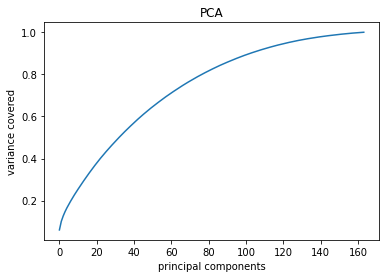

In [36]:
plt.figure()                                          # checking PCA Components using spreeplot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [37]:
# By Using spreeplot,i found that components=140 cover the full variance.


In [38]:
pca=PCA(n_components=140)
new_pca=pca.fit_transform(x_scaled)
new_pca.shape[1]



140

In [39]:
columns=[]
for i in range(0,new_pca.shape[1]):
    columns.append(i)

In [40]:
columns

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139]

In [42]:
comp=pd.DataFrame(new_pca,columns=columns)   # chosen the Best 140 components and stored in comp.
comp

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.830730,-2.540147,-0.347061,-0.203001,1.624292,-0.319760,-0.908131,-0.325278,0.336095,0.525090,...,0.301339,0.523763,-0.468196,0.340474,-0.093603,0.334474,0.748997,0.190865,0.509645,0.529142
1,2.153852,0.364719,-1.053907,-2.062768,3.456778,0.055805,-1.357612,-0.166506,0.639599,0.792139,...,0.035845,0.430252,-1.514007,-0.315605,-0.599455,0.556522,-0.141957,-0.174800,0.882625,0.480345
2,-2.441800,-0.374335,-0.866622,-1.000452,3.462805,0.026930,-2.237005,-1.124478,-0.633830,-1.139907,...,-0.015480,0.006546,-0.176517,0.296286,0.011405,0.160981,-0.109396,-0.115151,0.025387,0.276904
3,3.849400,-1.869734,1.039400,-2.093748,0.787304,-1.319214,0.102667,-0.477347,-1.044483,-0.133153,...,0.012701,0.516211,-0.280048,-0.132336,-0.512650,0.930779,-0.602415,-0.109354,0.639506,0.237819
4,-1.943123,-4.814494,-0.286968,1.161652,2.008406,1.733814,1.970755,1.071655,-2.882029,-1.647922,...,0.089623,-0.817232,0.210199,-0.103633,-0.236261,0.228136,-0.201277,-0.298046,0.124631,-0.010374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-5.064805,2.061932,-1.649720,-2.341602,-1.488467,1.349749,-0.135789,0.325648,-1.402053,1.974279,...,-0.427591,-0.025583,-0.481248,0.602458,0.055199,0.045217,0.452337,0.478796,-0.032547,-0.277261
567,-4.149315,2.806984,-0.578426,-2.603201,-0.992736,2.678631,-0.305183,-1.011976,0.756323,1.960684,...,-0.434772,-0.769207,-0.185816,-0.392910,0.304956,0.324861,-0.163869,-0.008884,-0.511734,-0.107324
568,-2.744394,0.490877,2.101302,-0.914666,-1.580511,0.388441,-0.316883,-1.005006,1.858309,-0.488430,...,0.236035,0.158837,-0.819762,0.621289,-0.192521,0.080823,-0.124839,-0.731089,-0.716975,-0.528203
569,3.274959,2.371225,0.536810,-0.666883,1.251658,1.347001,0.336088,-0.151882,1.592724,0.013016,...,-0.297500,0.320252,-0.541964,-0.086775,-1.159330,0.230492,-0.899353,-0.843787,0.034761,1.133782


                                              MODEL TRAINING.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [44]:
lr=LinearRegression()

In [45]:
x_train,x_test,y_train,y_test=train_test_split(comp,y,test_size=0.25,random_state=55)
lr.fit(x_train,y_train)               # choosing Random state randomly as our training and testing score is not getting matched fully.



LinearRegression()

In [46]:
pred_test=lr.predict(x_test)
pred_test


array([2.84161159, 3.03913697, 3.70411146, 3.34705802, 2.87661041,
       3.53900127, 3.59271721, 2.80618704, 3.14188521, 2.26092958,
       2.84353981, 2.69437706, 2.76715303, 3.14584543, 2.3795555 ,
       3.57198985, 3.82351412, 3.20848011, 3.28828594, 2.13265273,
       3.9100006 , 2.86056973, 3.30090713, 3.44810516, 2.99316685,
       3.81068858, 3.61794513, 2.31474284, 3.80218392, 3.15350468,
       3.1864538 , 3.09792885, 2.68388074, 2.79134021, 2.32280617,
       3.65935431, 3.9188726 , 2.59946692, 3.44858835, 3.30475646,
       2.64110572, 2.24068827, 1.50218773, 1.87794522, 2.30663648,
       3.28772063, 1.98920988, 2.81198176, 3.39423331, 2.31483794,
       2.79223475, 2.23861259, 3.68277293, 3.7560422 , 3.31377484,
       2.14395542, 3.0390631 , 2.97850375, 2.98818757, 3.42386369,
       3.37077351, 2.64740863, 2.48875328, 1.92435328, 3.18586875,
       2.81458826, 1.94669484, 3.83498953, 2.38717949, 3.57752151,
       3.55466144, 1.86246574, 3.44765719, 2.47252145, 3.23538

In [47]:
lr_score=r2_score(y_test,pred_test)
lr_score

0.8502928519305639

In [48]:
pred_train=lr.predict(x_train)
pred_train

array([3.18425362, 3.32365552, 3.98743081, 2.92844824, 1.79874003,
       2.77039205, 1.75137693, 1.54160842, 2.08249026, 1.9379463 ,
       2.45305143, 3.29316061, 3.90976999, 3.46116685, 3.71667989,
       2.09500492, 3.72629544, 2.2357183 , 1.92408746, 3.66823363,
       2.06738422, 3.06669508, 2.14726837, 2.62542988, 2.25166084,
       3.68577456, 3.76218142, 3.18123423, 3.75051976, 3.00603974,
       3.29878636, 2.78982506, 3.74345576, 3.86149552, 3.69446738,
       3.13656183, 2.74297018, 3.12809283, 2.86856694, 3.52660802,
       3.13997086, 2.86464102, 2.50654357, 2.07120592, 3.90282757,
       3.49246959, 3.56364128, 2.41558957, 2.27190209, 3.14390578,
       2.95262273, 2.86114763, 3.16096732, 3.44699741, 3.64026996,
       2.75467822, 2.9239361 , 2.28364292, 3.8234182 , 1.92315064,
       2.62410002, 3.64995406, 3.85346891, 3.44000945, 2.55306905,
       1.68726321, 3.51445822, 2.44460924, 3.05775803, 3.65245278,
       3.50257777, 2.127775  , 3.26290897, 3.49291761, 3.56833

In [49]:
r2_score(y_train,pred_train)

0.9219951127288482

In [50]:
print("Linear Regression,Training Score: ",r2_score(y_train,pred_train)*100)
print("Linear Regression Test Score:",r2_score(y_test,pred_test)*100)
print("Difference between the score",(r2_score(y_train,pred_train)*100-r2_score(y_test,pred_test)*100))
print("Mean Squared Error is:",mean_squared_error(y_test,pred_test)*100)
print("Mean absolute Error is:",mean_absolute_error(y_test,pred_test)*100)

    


Linear Regression,Training Score:  92.19951127288482
Linear Regression Test Score: 85.0292851930564
Difference between the score 7.170226079828424
Mean Squared Error is: 5.515603759562612
Mean absolute Error is: 18.25893390379106


                                        Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score             # Importing Libararies.

In [52]:
for j in range(2,10):
    cvs=cross_val_score(lr,x,y,cv=j)
    print(cvs*100)
    cvm=cvs.mean()
    print("At Cross Fold:",j)
    print("The Cross Validation score is :",cvm*100)
    print("The Model Score is: ",r2_score(y_test,pred_test))

[71.98547614 53.18709636]
At Cross Fold: 2
The Cross Validation score is : 62.58628625168174
The Model Score is:  0.8502928519305639
[77.3706029  80.83092343 49.57482898]
At Cross Fold: 3
The Cross Validation score is : 69.25878510361657
The Model Score is:  0.8502928519305639
[73.80566981 77.30005007 73.07119858 53.20468119]
At Cross Fold: 4
The Cross Validation score is : 69.34539991281603
The Model Score is:  0.8502928519305639
[79.53587784 81.84832821 81.37233315 82.97821889 79.12886826]
At Cross Fold: 5
The Cross Validation score is : 80.9727252692599
The Model Score is:  0.8502928519305639
[79.19519625 82.02603245 83.84517969 80.10271687 84.58652506 79.02689917]
At Cross Fold: 6
The Cross Validation score is : 81.4637582495049
The Model Score is:  0.8502928519305639
[73.57853356 84.71826731 81.17751242 81.85110858 81.57538934 85.03782345
 83.38747343]
At Cross Fold: 7
The Cross Validation score is : 81.61801544159293
The Model Score is:  0.8502928519305639
[76.80710755 82.2615007

In [53]:
# Choosing the Cross valid Fold as 9 ,as the difference between the cross valid score and the model score is less.

                                                   Training the Model with other Algorithms.

In [54]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvscore=cross_val_score(algorithm,comp,y,cv=9)
    cvmean=cvscore.mean()
    print("The Model Name is :",algorithm)
    print("The Model Training score is:",r2_score(y_train,pred_algo_train)*100)
    print("The Model Test score is :",r2_score(y_test,pred_algo_test)*100)
    print("The Cross Validation score of the Model is:",cvmean*100)
    print("The Difference between the cross validation and the model score is:",(r2_score(y_test,pred_algo_test)*100-cvmean*100))
    print("The Mean squared error is :",mean_squared_error(y_test,pred_algo_test))
    print("The Mean absolute Error is :",mean_absolute_error(y_test,pred_algo_test))


In [55]:
# Training the Model with Decision Tree  Regressor
from sklearn.tree import DecisionTreeRegressor

In [56]:
dt=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(comp,y,test_size=.25,random_state=55)

In [57]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor()
The Model Training score is: 100.0
The Model Test score is : 80.21738976713189
The Cross Validation score of the Model is: 79.50084135045213
The Difference between the cross validation and the model score is: 0.7165484166797569
The Mean squared error is : 0.07288432167832168
The Mean absolute Error is : 0.20071328671328675


In [58]:
# Training the Model with KNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor

In [59]:
knn=KNeighborsRegressor()


In [60]:
model_selection(knn,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor()
The Model Training score is: 91.42442708397846
The Model Test score is : 83.528815538384
The Cross Validation score of the Model is: 85.53567186292418
The Difference between the cross validation and the model score is: -2.0068563245401805
The Mean squared error is : 0.06068416111888111
The Mean absolute Error is : 0.1722993006993007


In [61]:
# Training the Model with SVM Regressor

In [62]:
from sklearn.svm import SVR

In [63]:
svr=SVR()

In [64]:
model_selection(svr,x_train,x_test,y_train,y_test)

The Model Name is : SVR()
The Model Training score is: 97.26825813760118
The Model Test score is : 88.7611334614659
The Cross Validation score of the Model is: 87.23029977442032
The Difference between the cross validation and the model score is: 1.530833687045586
The Mean squared error is : 0.04140693035205622
The Mean absolute Error is : 0.1548863393003615


In [65]:
# Training the Model with Linear_models
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor

In [66]:
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()

In [67]:
model_selection(sgd,x_train,x_test,y_train,y_test)
model_selection(lasso,x_train,x_test,y_train,y_test)
model_selection(ridge,x_train,x_test,y_train,y_test)

The Model Name is : SGDRegressor()
The Model Training score is: 91.69193140633504
The Model Test score is : 85.37457310246884
The Cross Validation score of the Model is: 83.3148778856137
The Difference between the cross validation and the model score is: 2.059695216855147
The Mean squared error is : 0.05388390642764507
The Mean absolute Error is : 0.17947896207816938
The Model Name is : Lasso()
The Model Training score is: 53.41730827273496
The Model Test score is : 56.4073459856319
The Cross Validation score of the Model is: 53.98865416377395
The Difference between the cross validation and the model score is: 2.418691821857948
The Mean squared error is : 0.16060676425379625
The Mean absolute Error is : 0.32058313790977155
The Model Name is : Ridge()
The Model Training score is: 92.19937967905874
The Model Test score is : 85.08089317083571
The Cross Validation score of the Model is: 83.80251864737099
The Difference between the cross validation and the model score is: 1.27837452346472
T

In [68]:
 # Training the Models with Ensemble methods 
from sklearn.ensemble import RandomForestRegressor              #randomforestRegressor
from sklearn.ensemble import AdaBoostRegressor                  #AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor          #GradientBoostRegressor
from xgboost import XGBRegressor                                # ExtraGradientBoostRegressor

In [69]:
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gbt=GradientBoostingRegressor()
xgb=XGBRegressor()

In [70]:
model_selection(rf,x_train,x_test,y_train,y_test)
model_selection(ada,x_train,x_test,y_train,y_test)
model_selection(gbt,x_train,x_test,y_train,y_test)
model_selection(xgb,x_train,x_test,y_train,y_test)

The Model Name is : RandomForestRegressor()
The Model Training score is: 98.40449858116916
The Model Test score is : 90.30317123904571
The Cross Validation score of the Model is: 89.48771425852436
The Difference between the cross validation and the model score is: 0.815456980521347
The Mean squared error is : 0.035725658967832204
The Mean absolute Error is : 0.14233874125874132
The Model Name is : AdaBoostRegressor()
The Model Training score is: 94.06242154014912
The Model Test score is : 89.1576972342085
The Cross Validation score of the Model is: 87.91256700874254
The Difference between the cross validation and the model score is: 1.2451302254659566
The Mean squared error is : 0.03994588546271606
The Mean absolute Error is : 0.15526586751335267
The Model Name is : GradientBoostingRegressor()
The Model Training score is: 99.31521385337551
The Model Test score is : 90.62566268915701
The Cross Validation score of the Model is: 90.88498264444517
The Difference between the cross validatio

In [71]:
# After considering the Model performance,choosing GradientBoostingRegressor for hyper Tuning.

                                               Hyper Tuning.

In [72]:
from sklearn.model_selection import GridSearchCV

In [74]:
params={'learning_rate':[0,0.005,0.5,0.1],'n_estimators':[0,100,10],'min_samples_split':[0,4],'max_depth':[0,4]} # choosing the parameters for hyper Tuning


In [75]:
grd=GridSearchCV(gbt,param_grid=params) # Hyper Tuning the Model with GridSearchCV.
grd.fit(x_train,y_train)
print("Best params:",grd.best_params_) # got the Best Params.

Best params: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 100}


In [76]:
gbt_hyper=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, min_samples_split= 4, n_estimators= 100)#Tuning the Model.

In [77]:
model_selection(gbt_hyper,x_train,x_test,y_train,y_test)

The Model Name is : GradientBoostingRegressor(max_depth=4, min_samples_split=4)
The Model Training score is: 99.87050099778719
The Model Test score is : 91.81550806004624
The Cross Validation score of the Model is: 90.69695157936786
The Difference between the cross validation and the model score is: 1.1185564806783788
The Mean squared error is : 0.03015381369310519
The Mean absolute Error is : 0.1290133270779026


In [78]:
# Observations:
#1.Before Hyper tuning ,the Training score is:
#The Model Training score is: 99.31521385337551
#The Model Test score is : 90.62566268915701
#The Cross Validation score of the Model is: 90.88498264444517

#2.After Hyper Tuning:
#The Model Training score is: 99.87050099778719
#The Model Test score is : 91.81550806004624
#The Cross Validation score of the Model is: 90.69695157936786  

# we See improvement in the Model,test score  after Hyper Tuning so choosing the hyper tuned model 


In [79]:
                               # MODEL SAVING

In [80]:
import pickle 
filename='student_grade_prediction.pkl'
pickle.dump(gbt_hyper,open(filename,'wb'))

In [83]:
loaded_model=pickle.load(open('student_grade_prediction.pkl','rb'))
prediction=loaded_model.predict(x_test)
print(loaded_model.score(x_test,y_test)*100)

91.81550806004624


In [82]:
                            # CONCLUSION.
a=np.array(y_test)
predict=np.array(prediction)
conclusion=pd.DataFrame({'Original':a,'Prediction':predict})
conclusion

,Original,Prediction
0,2.379,2.605995
1,3.090,3.101510
2,3.725,3.717211
3,3.492,3.463442
4,2.760,2.965992
...,...,...
138,3.369,3.204047
139,3.405,3.425168
140,2.822,2.869624
141,2.378,2.462674
